In [6]:
import os
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# #####  Make a directory named 'data' within the notebook/working directory #####

# data\ contents:
# ---------------
# Contents: 2 folders, 1 csv file:

# data\
#   features_basic\                    [1067 parquet files]
#   features_anomalies_removed\        [1095 parquet files] 1067?
#   cost_data.csv

In [2]:
# Data files PATH:
path_1 = r'data\cost_data.csv'
path_2 = r'data\features_basic'
path_3 = r'data\features_anomalies_removed'

#### Load Data files to DataFrames for MacOS / Linux systems:

In [ ]:
# Load Data files to DataFrames for MacOS / Linux systems:

df_orig_data = pd.read_csv(path_1)
df_basic = pd.read_parquet(path_2)
df_noanomaly = pd.read_parquet(path_3)

#### Load Data files to DataFrames for Windows systems:

In [79]:
# Load Data files to DataFrames for Windows systems:

def read_parquet_folder_as_pandas(path, verbosity=1):
    files = [f for f in os.listdir(path) if f.endswith("parquet")]

    if verbosity > 0:
        print("{} parquet files found. Beginning reading...".format(len(files)), end="")
        start = datetime.datetime.now()

    df_list = [pd.read_parquet(os.path.join(path, f)) for f in files]
    df = pd.concat(df_list, ignore_index=True)

    if verbosity > 0:
        end = datetime.datetime.now()
        print(" Finished. Took {}".format(end-start))
    return df


# def read_parquet_as_pandas(path, verbosity=1):
#   """Workaround for pandas not being able to read folder-style parquet files."""
#   if os.path.isdir(path):
#     if verbosity>1: print("Parquet file is actually folder.")
#     return read_parquet_folder_as_pandas(path, verbosity)
#   else:
#     return pd.read_parquet(path)

In [98]:
df_orig_data = pd.read_csv(path_1)
df_basic = read_parquet_folder_as_pandas(path_2)
df_noanomaly = read_parquet_folder_as_pandas(path_3)

1067 parquet files found. Beginning reading... Finished. Took 0:01:12.547519
1067 parquet files found. Beginning reading... Finished. Took 0:00:28.084028


As all files are of '.parquet' type, 

The folder "features_basic" contains 1067 files(Metrics)

While the folder "features_anomalies_removed" contains 1095 files(Metrics),

Thats because there are 28 files with the following file types:

file_name.parquet(1) -> 23 files

file_name.parquet(2) ->  5 files

list of all the above files: (1095 - 1067 = 28)

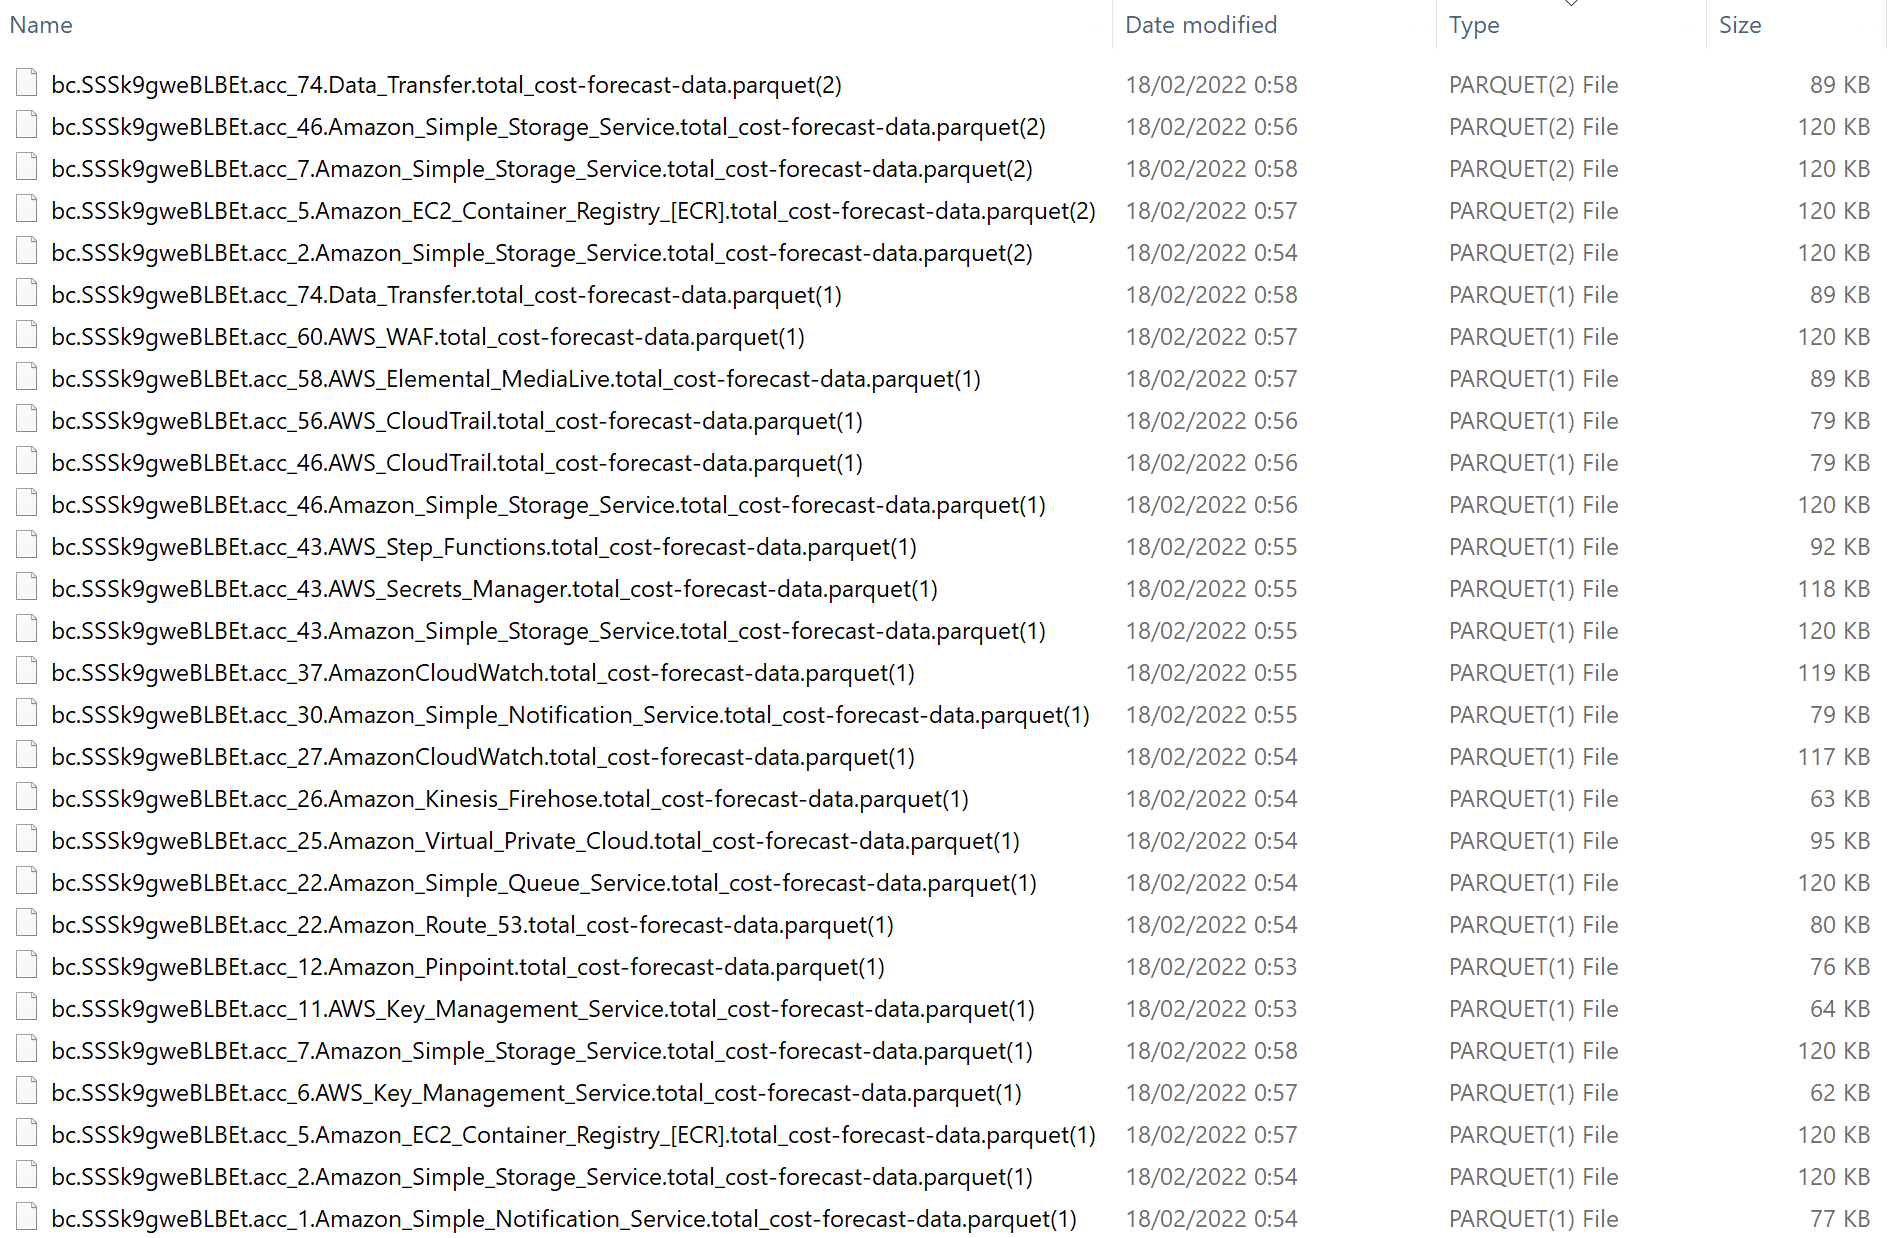

#### It seems that all of them are copies of existing files, see examples below.
#### The files are different by type, but identical by name & size:

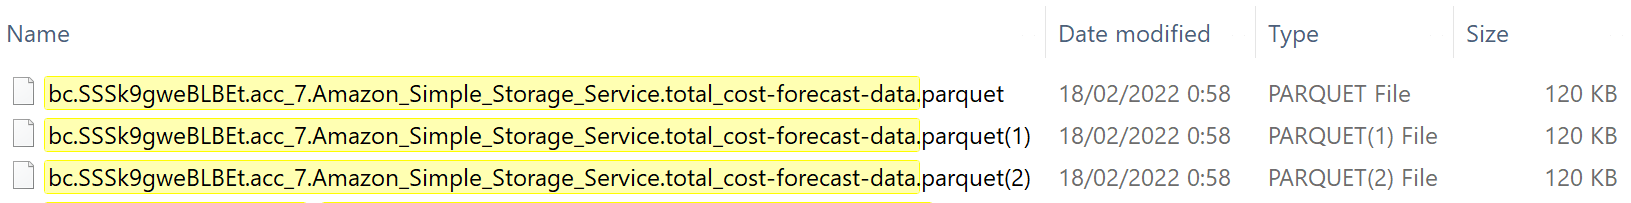

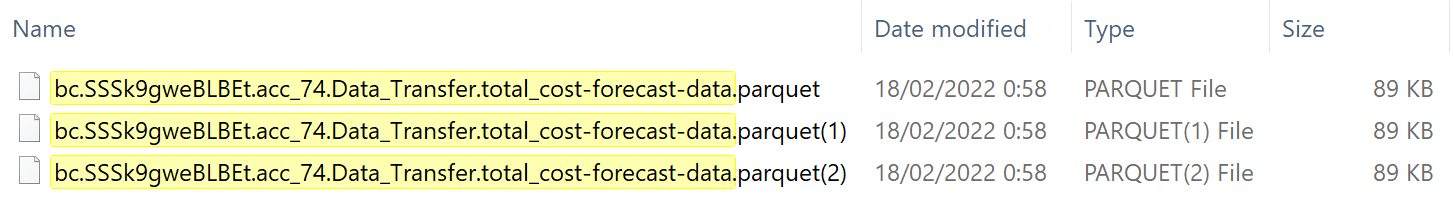

# EDA:
There are 3 data sets provided:
1. cost_data.csv
2. features_basic\                 folder with 1067 parquet files.
3. features_anomalies_removed\     folder with       1095 parquet files. (should be 1067? as metioned above)

In [89]:
print('df_orig_data shape:', df_orig_data.shape)
print('df_basic shape:    ', df_basic.shape)
print('df_noanomaly shape:', df_noanomaly.shape)

df_orig_data shape: (299973, 4)
df_basic shape:     (9679740, 69)
df_noanomaly shape: (9679740, 69)


### df_orig_data:

In [96]:
df_orig_data.sample(5)

,ts,account_id,service_name,total_cost
257242,2021-07-31,acc_62,AWS_CloudTrail,0.000000
77024,2021-08-18,acc_69,Amazon_Simple_Queue_Service,0.000000
99466,2021-04-28,acc_62,Amazon_Simple_Storage_Service,0.000052
129322,2021-12-19,acc_32,AmazonCloudWatch,0.605164
38969,2021-10-02,acc_60,Amazon_API_Gateway,0.000025


In [97]:
df_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299973 entries, 0 to 299972
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ts            299973 non-null  datetime64[ns]
 1   account_id    299973 non-null  object        
 2   service_name  299973 non-null  object        
 3   total_cost    299973 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.2+ MB


In [87]:
df_orig_data.loc[:, 'ts'] = pd.to_datetime(df_orig_data.ts, unit='s')#, dayfirst=True)

In [91]:
df_orig_data.sort_values(['account_id', 'ts'], ascending=[True, True])

,ts,account_id,service_name,total_cost
52699,2021-06-04,acc_1,Amazon_Virtual_Private_Cloud,3.828006
74702,2021-06-04,acc_1,Amazon_Simple_Queue_Service,0.000000
114397,2021-06-04,acc_1,AWS_Key_Management_Service,0.012600
119464,2021-06-04,acc_1,Amazon_ElastiCache,2.410000
125157,2021-06-04,acc_1,EDP,-126.570000
...,...,...,...,...
248250,2022-02-07,acc_9,AWS_CloudTrail,0.000000
250541,2022-02-07,acc_9,AmazonCloudWatch,65.847608
274571,2022-02-07,acc_9,Amazon_Elastic_Compute_Cloud,342.105301
286600,2022-02-07,acc_9,AWS_Secrets_Manager,0.028565


In [94]:
df_orig_data[df_orig_data['account_id']=='acc_1']

,ts,account_id,service_name,total_cost
0,2021-10-22,acc_1,AWS_Glue,0.000010
10411,2021-08-30,acc_1,AWS_WAF,0.163880
10412,2021-08-31,acc_1,AWS_WAF,0.451608
10413,2021-09-01,acc_1,AWS_WAF,0.451608
10414,2021-09-02,acc_1,AWS_WAF,-5.513344
...,...,...,...,...
275179,2022-02-03,acc_1,Amazon_Elastic_Container_Service_for_Kubernetes,2.400000
275180,2022-02-04,acc_1,Amazon_Elastic_Container_Service_for_Kubernetes,2.400000
275181,2022-02-05,acc_1,Amazon_Elastic_Container_Service_for_Kubernetes,2.400000
275182,2022-02-06,acc_1,Amazon_Elastic_Container_Service_for_Kubernetes,2.400000


In [95]:
df_orig_data[df_orig_data['account_id']=='acc_1'].sort_values(['account_id', 'ts'], ascending=[True, True])

,ts,account_id,service_name,total_cost
52699,2021-06-04,acc_1,Amazon_Virtual_Private_Cloud,3.828006
74702,2021-06-04,acc_1,Amazon_Simple_Queue_Service,0.000000
114397,2021-06-04,acc_1,AWS_Key_Management_Service,0.012600
119464,2021-06-04,acc_1,Amazon_ElastiCache,2.410000
125157,2021-06-04,acc_1,EDP,-126.570000
...,...,...,...,...
240405,2022-02-07,acc_1,Amazon_Elastic_Compute_Cloud,281.780463
250790,2022-02-07,acc_1,Amazon_Simple_Storage_Service,5.780220
260491,2022-02-07,acc_1,AmazonCloudWatch,5.044068
269779,2022-02-07,acc_1,OpenVPN_Access_Server_[10_Connected_Devices],2.400000


In [ ]:
d.sort_index(inplace=True)

### df_basic:

In [19]:
df_basic.sample(8)

,level_0,timestamp_1d,horizon,y,avg_lb1:y,lag1:y,lag2:y,lag3:y,lag4:y,lag5:y,...,win:5:se:events-time_event_type=quarter_start:first,win:6:se:events-time_event_type=quarter_start:first,win:7:se:events-time_event_type=quarter_start:first,win:8:se:events-time_event_type=quarter_start:first,win:9:se:events-time_event_type=quarter_start:first,time:day_of_week,time:day_of_month,time:month_of_quarter,time:odd_month,time:middle_of_month
4737245,bc.SSSk9gweBLBEt.acc_4.Savings_Plans_for_AWS_C...,2022-01-15,30,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,False,False,False,False,False,0,14,2,0,0
3973359,bc.SSSk9gweBLBEt.acc_35.Data_Transfer.total_cost,2021-05-24,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,5,5,0,0,0
1658340,bc.SSSk9gweBLBEt.acc_2.Amazon_Redshift.total_cost,2021-08-08,5,92.490990,100.417354,92.634050,92.526310,92.884700,146.565695,92.861050,...,False,False,False,False,False,4,13,2,0,0
4306165,bc.SSSk9gweBLBEt.acc_38.Amazon_Simple_Storage_...,2021-06-29,16,1.000000,1.014286,1.000000,1.000000,1.000000,1.000000,1.100000,...,False,False,False,False,False,3,15,1,1,1
4201380,bc.SSSk9gweBLBEt.acc_37.Amazon_Simple_Storage_...,2021-07-19,19,113.902369,126.932887,116.047886,115.742090,124.694411,122.957622,137.719549,...,False,False,False,False,False,5,7,2,0,0
9613698,bc.SSSk9gweBLBEt.acc_9.AWS_Secrets_Manager.tot...,2021-09-20,28,0.026669,0.026669,0.026669,0.026669,0.026669,0.026669,0.026669,...,False,False,False,False,False,0,18,1,0,0
3413870,bc.SSSk9gweBLBEt.acc_30.AWS_Config.total_cost,2021-12-11,8,2.378000,2.206571,2.426000,1.787000,3.266000,1.910000,1.817000,...,False,False,False,False,False,6,19,0,0,0
3872576,bc.SSSk9gweBLBEt.acc_34.Data_Transfer.total_cost,2021-02-25,21,22.093515,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,3,18,0,1,0


In [12]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9679740 entries, 0 to 9679739
Data columns (total 69 columns):
 #   Column                                                           Dtype         
---  ------                                                           -----         
 0   level_0                                                          object        
 1   timestamp_1d                                                     datetime64[ns]
 2   horizon                                                          int64         
 3   y                                                                float64       
 4   avg_lb1:y                                                        float64       
 5   lag1:y                                                           float64       
 6   lag2:y                                                           float64       
 7   lag3:y                                                           float64       
 8   lag4:y                          

### df_noanomaly:

In [20]:
df_noanomaly.sample(8)

,level_0,timestamp_1d,horizon,y,avg_lb1:y,lag1:y,lag2:y,lag3:y,lag4:y,lag5:y,...,win:5:se:events-time_event_type=quarter_start:first,win:6:se:events-time_event_type=quarter_start:first,win:7:se:events-time_event_type=quarter_start:first,win:8:se:events-time_event_type=quarter_start:first,win:9:se:events-time_event_type=quarter_start:first,time:day_of_week,time:day_of_month,time:month_of_quarter,time:odd_month,time:middle_of_month
546769,bc.SSSk9gweBLBEt.acc_12.Data_Transfer.total_cost,2021-12-30,12,71.689002,48.079430,65.639540,52.654975,40.813356,34.014258,40.322175,...,False,False,False,False,False,1,11,1,1,0
2539395,bc.SSSk9gweBLBEt.acc_25.Amazon_Elastic_Contain...,2021-09-02,19,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,...,False,False,False,False,False,1,21,0,1,0
2239460,bc.SSSk9gweBLBEt.acc_22.Amazon_Simple_Queue_Se...,2021-12-26,29,0.030701,0.030984,0.030743,0.030785,0.031164,0.030959,0.031087,...,False,False,False,False,False,0,24,1,1,0
3444464,bc.SSSk9gweBLBEt.acc_30.AWS_Lambda.total_cost,2021-02-23,5,3.625185,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,6,28,2,0,0
565445,bc.SSSk9gweBLBEt.acc_12.OpenVPN_Access_Server_...,2021-12-19,9,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,...,False,False,False,False,False,1,28,0,0,0
9569350,bc.SSSk9gweBLBEt.acc_9.Amazon_Virtual_Private_...,2021-10-17,23,3.600000,3.600000,3.600000,3.600000,3.600000,3.600000,3.600000,...,False,False,False,False,False,1,9,2,1,0
2718257,bc.SSSk9gweBLBEt.acc_26.Amazon_Simple_Notifica...,2021-12-21,12,0.000017,0.000005,0.000017,0.000017,0.000000,0.000000,0.000000,...,False,False,False,False,False,6,2,1,1,0
3900308,bc.SSSk9gweBLBEt.acc_35.Amazon_Simple_Notifica...,2021-04-08,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,5,17,1,0,0


In [15]:
df_noanomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9679740 entries, 0 to 9679739
Data columns (total 69 columns):
 #   Column                                                           Dtype         
---  ------                                                           -----         
 0   level_0                                                          object        
 1   timestamp_1d                                                     datetime64[ns]
 2   horizon                                                          int64         
 3   y                                                                float64       
 4   avg_lb1:y                                                        float64       
 5   lag1:y                                                           float64       
 6   lag2:y                                                           float64       
 7   lag3:y                                                           float64       
 8   lag4:y                          

In [16]:
# datetime64[ns]

In [ ]:
df = pd.read_parquet(r'acc_74_Elastic_Load_Balancing.total_cost-forecast-data.parquet')

In [ ]:
# dfq.info()

In [ ]:
df_basic = read_parquet_folder_as_pandas(path)

In [ ]:
df_basic

In [ ]:
df_basic.info()

In [ ]:
df_files_diff = read_parquet_folder_as_pandas(path)

In [ ]:
df_files_diff

In [ ]:
df_files_diff.info()

In [ ]:
df_0 = pd.read_parquet(r'C:\Users\Auser1\copy for the lecture\Project_notebooks\files_diff\bc.SSSk9gweBLBEt.acc_74.Data_Transfer.total_cost-forecast-data_copy1.parquet')

In [ ]:
df_1 = pd.read_parquet(r'C:\Users\Auser1\copy for the lecture\Project_notebooks\files_diff\bc.SSSk9gweBLBEt.acc_74.Data_Transfer.total_cost-forecast-data_copy1.parquet')

In [ ]:
df_2 = pd.read_parquet(r'C:\Users\Auser1\copy for the lecture\Project_notebooks\files_diff\bc.SSSk9gweBLBEt.acc_74.Data_Transfer.total_cost-forecast-data_copy2.parquet')

In [ ]:
df_0.info()

In [ ]:
df_1.info()

In [ ]:
df_2.info()

In [ ]:
# DataFrame.equals(other)

# Test whether two objects contain the same elements.
# This function allows two Series or DataFrames to be compared against each other to see if they have
# the same shape and elements. NaNs in the same location are considered equal.
# The row/column index do not need to have the same type, as long as the values are considered equal.
# Corresponding columns must be of the same dtype.

In [ ]:
df_0.equals(df_1)

In [ ]:
df_1.equals(df_2)

In [ ]:
df_0.equals(df_2)

In [ ]:
# DataFrame.compare(other, align_axis=1, keep_shape=False, keep_equal=False)

In [ ]:
df_0.compare(df_1)

In [ ]:
df_1.compare(df_2)

In [ ]:
df_0.compare(df_2)

In [6]:
# Plotting

In [ ]:
# Figure can have size (in inches)
# plt.figure(figsize=(6,6))
# plt.plot();

In [ ]:
# plt.figure()
# plt.plot()
# plt.show()

In [57]:
df_orig_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ts,299973.0,1.629208e+09,9.025068e+06,1.612915e+09,1.621469e+09,1.629590e+09,1.637021e+09,1.644192e+09
total_cost,299973.0,7.074323e+01,1.246924e+03,-1.600207e+05,1.240000e-04,2.400000e-01,7.200000e+00,1.127552e+05


In [25]:
df_orig_data['account_id'].nunique()

75

In [26]:
df_orig_data['service_name'].nunique()

118

In [76]:
pd.unique(df[['service_name', 'account_id']].values())

NameError: name 'df' is not defined

In [73]:
df_orig_data.groupby('service_name','account_id')['account_id'].size().sort_values(ascending=False).to_frame()#.value_counts()

ValueError: No axis named account_id for object type DataFrame

<AxesSubplot:xlabel='Count', ylabel='service_name'>

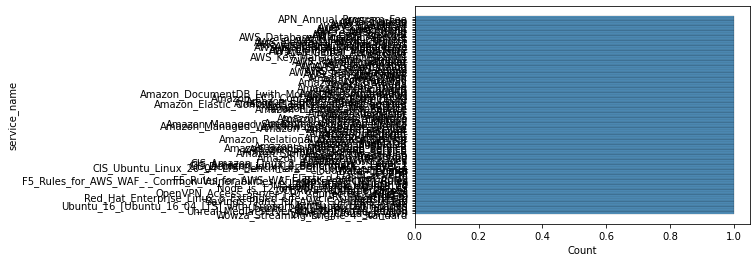

In [71]:
sns.histplot(data=df_orig_data.groupby("service_name")['account_id'].size(), y="service_name")

In [ ]:
df_orig_data
df_basic
df_noanomaly

In [60]:
# Dataset spliting columns by type: 
basic_numeric_df = df_basic.select_dtypes(include=['float64','int64']).copy()
basic_categorial_df = df_basic.select_dtypes(include=['object','bool']).copy()

print('\n\nbasic_numeric_df shape:', basic_numeric_df.shape, '\nbasic_categorial_df shape:' ,basic_categorial_df.shape)



basic_numeric_df shape: (9679740, 15) 
basic_categorial_df shape: (9679740, 53)


### Checking for missing values:

It is important to understand the amount of missing values in the Train and in the Test datasets:

In [46]:
df_orig_data_qty_miss_val = df_orig_data.isnull().sum()
#df_orig_data_miss_value = df_orig_data_qty_miss_val[df_orig_data_qty_miss_val > 0].sort_values(ascending=False).to_frame()
#df_orig_data_qty_miss_val.columns =['QTY NaN @ df_basic']
df_orig_data_qty_miss_val.to_frame()


,0
ts,0
account_id,0
service_name,0
total_cost,0


In [52]:
# df_basic.isnull()

In [51]:
# df_basic_qty_miss_val.to_frame()

In [47]:
df_basic_qty_miss_val = df_basic.isnull().sum()
df_noanomaly_qty_miss_val = df_noanomaly.isnull().sum()

df_basic_miss_value = df_basic_qty_miss_val[df_basic_qty_miss_val > 0].sort_values(ascending=False).to_frame()
df_noanomaly_miss_value = df_noanomaly_qty_miss_val[df_noanomaly_qty_miss_val > 0].sort_values(ascending=False).to_frame()


nan_summary = pd.concat([df_basic_miss_value,df_noanomaly_miss_value], axis=1)
nan_summary.columns =['QTY NaN @ df_basic', 'QTY NaN @ df_noanomaly']
nan_summary

,QTY NaN @ df_basic,QTY NaN @ df_noanomaly
avg_lb1:y,1531410,1531410
lag1:y,1531410,1531410
lag2:y,1531410,1531410
lag3:y,1531410,1531410
lag4:y,1531410,1531410
lag5:y,1531410,1531410
lag6:y,1531410,1531410
lag7:y,1531410,1531410
y,906960,906960


In [54]:
## Date dType??

In [58]:
# Numerical features main statistical measures:
basic_numeric_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,9679740.0,15.500000,8.655442,1.000000,8.000000,15.500000,23.000000,30.000000
y,8772780.0,72.654088,981.318724,-160020.730000,0.002994,0.600298,7.444625,85203.822463
avg_lb1:y,8148330.0,77.058814,605.697761,-13088.675714,0.006850,0.720319,7.766251,13491.198761
lag1:y,8148330.0,77.001819,842.533591,-160020.730000,0.004848,0.720000,8.671632,15627.406154
lag2:y,8148330.0,77.065339,842.909574,-160020.730000,0.004845,0.720000,8.671632,15627.406154
lag3:y,8148330.0,77.060463,842.923728,-160020.730000,0.004839,0.720000,8.669918,15627.406154
lag4:y,8148330.0,77.044110,842.884945,-160020.730000,0.004822,0.720000,8.668612,15627.406154
lag5:y,8148330.0,77.074292,843.068340,-160020.730000,0.004801,0.720000,8.667363,15627.406154
lag6:y,8148330.0,77.063286,843.143987,-160020.730000,0.004795,0.720000,8.667360,15627.406154
lag7:y,8148330.0,77.102392,843.848925,-160020.730000,0.004793,0.720000,8.653354,15627.406154


In [59]:
# Categorial features main statistical measures:
#basic_categorial_df.describe().transpose()

In [61]:
basic_categorial_df

,level_0,current:se:events-time_event_type=month_start:first,current:win:sum:1:se:events-time_event_type=month_start:first,current:win:sum:2:se:events-time_event_type=month_start:first,current:win:sum:3:se:events-time_event_type=month_start:first,current:win:1:se:events-time_event_type=month_start:first,current:win:2:se:events-time_event_type=month_start:first,current:win:3:se:events-time_event_type=month_start:first,current:win:4:se:events-time_event_type=month_start:first,current:win:5:se:events-time_event_type=month_start:first,...,win:sum:3:se:events-time_event_type=quarter_start:first,win:1:se:events-time_event_type=quarter_start:first,win:2:se:events-time_event_type=quarter_start:first,win:3:se:events-time_event_type=quarter_start:first,win:4:se:events-time_event_type=quarter_start:first,win:5:se:events-time_event_type=quarter_start:first,win:6:se:events-time_event_type=quarter_start:first,win:7:se:events-time_event_type=quarter_start:first,win:8:se:events-time_event_type=quarter_start:first,win:9:se:events-time_event_type=quarter_start:first
0,bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679735,bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9679736,bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9679737,bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9679738,bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
basic_categorial_df['level_0']

0          bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...
1          bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...
2          bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...
3          bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...
4          bc.SSSk9gweBLBEt.acc_1.AmazonCloudWatch.total_...
                                 ...                        
9679735    bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...
9679736    bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...
9679737    bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...
9679738    bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...
9679739    bc.SSSk9gweBLBEt.acc_9.Savings_Plans_for_AWS_C...
Name: level_0, Length: 9679740, dtype: object

In [ ]:
# Preapre categorial data for ploting:

#cat1 = categorial_df[['Street','LotShape','LandContour','Utilities','LotConfig','LandSlope']].copy()
cat1 = basic_categorial_df[[]].copy()
cat2 = basic_categorial_df[[]].copy()
cat3 = basic_categorial_df[[]].copy()
cat4 = basic_categorial_df[[]].copy()
cat5 = basic_categorial_df[[]].copy()
cat6 = basic_categorial_df[[]].copy()
cat7 = basic_categorial_df[[]].copy()


cat1['SalePrice'] = orig_train_df.loc[cat1.index, 'SalePrice'].copy()
cat2['SalePrice'] = orig_train_df.loc[cat2.index, 'SalePrice'].copy()
cat3['SalePrice'] = orig_train_df.loc[cat3.index, 'SalePrice'].copy()
cat4['SalePrice'] = orig_train_df.loc[cat4.index, 'SalePrice'].copy()
cat5['SalePrice'] = orig_train_df.loc[cat5.index, 'SalePrice'].copy()
cat6['SalePrice'] = orig_train_df.loc[cat6.index, 'SalePrice'].copy()
cat7['SalePrice'] = orig_train_df.loc[cat7.index, 'SalePrice'].copy()

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))

for c in list(cat1.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = cat1, x=c, ax = ax1, palette='Set2')
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=cat1, x=c, y='SalePrice', ax=ax2, palette='Set2')
                       
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [ ]:
sns.histplot(data=basic_categorial_df, y="flipper_length_mm")